In [1]:
import pandas as pd


In [3]:
edata = pd.read_csv('takehome_user_engagement.csv')
edata

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [6]:
udata= pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")
udata

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [12]:
uservisitcounts = edata.groupby('user_id')['visited'].count().reset_index(name="count")

In [18]:

uservisitcounts['adopted']=uservisitcounts['count'].apply(lambda x: 0 if x<3 else None) 

In [25]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [39]:
import math
udata['invited'] = udata['invited_by_user_id'].apply(lambda x: 0 if math.isnan(x) else 1)

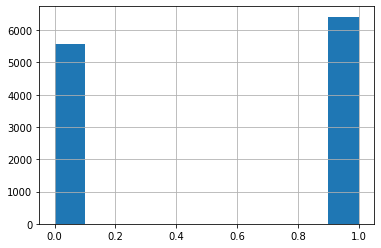

In [44]:
udata['invited'].hist()

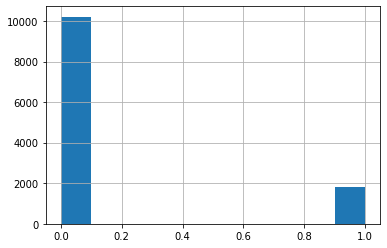

In [42]:
 udata['enabled_for_marketing_drip'].hist()

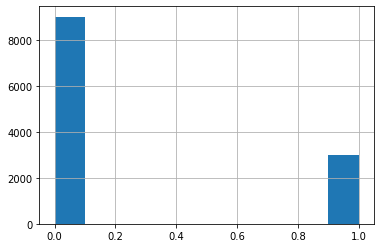

In [43]:
udata['opted_in_to_mailing_list'].hist()

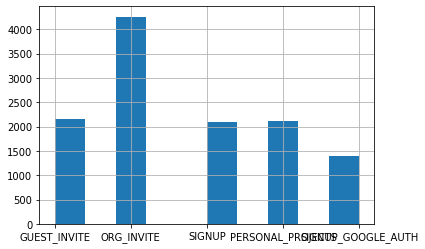

In [45]:
udata['creation_source'].hist()

## Analysis

1. This is classification problem, we would like to predict a user will adopt our product or not.
2. We can use the enagement data to setup the ground truth label for training our classification model.
3. Factors we need to consider are:  creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id, org_id
4. We can engineer a few more features to help with our model:
    * behavoir data from engagement data: times visited in the first 30 days, average weekly visit time.
    * gap time between created timestamp to last session timestamp